### Contents
1. Importing libraries and files


2. Data Wrangling
    - 2.1 Dropping PII Information from Data
    - 2.2 Overwriting Dataframe
 

3. Comparing customer behavior in different US geographical regions
    - 3.1 Creating a regional segmentation of the data
    - 3.2 Determining if there is a difference in spending habits between regions


4. Creating an exclusion flag for low-activity customers (customers with less than 5 orders) and excluding them from the data. 
    - 4.1 Creating subset for high-activity customers from the data and export the subset. 
    - 4.2 Excluding low-activity customers from the data and export the subset. 


5. Customer profiling
    - 5.1 Segmentation according to Age
    - 5.2 Segmentation according to Income
    - 5.3 Segmentation according to Number of Dependants
    - 5.4 Segmentation by Departments

6. Customer profile visualization
    - 6.1 Spending Habits according to Age Group
    - 6.2 Department purchases according to Household
    - 6.3 Loyal Customers and Days Since Prior Order
    - 6.4 Order Day of Week and Loyalty Status
    - 6.5 Pet Owners
    - 6.6 Alcohol Drinkers
    - 6.7 Families with a baby/babies
    - 6.8 Vegetarian

7. Customer profile aggregation for frequency and expenditure

8. Comparison of customer profiles within regions and departments
    - 8.1 Order Time of Day
    - 8.2 Order Time of Day and Department
    - 8.3 Pet Owners Per Region
    - 8.4 Order Day of Week and Age Group
    - 8.5 Household Status by US Region
    - 8.6 Loyal Customers by US Region
    - 8.7 Vegetarians in each Region

9. Exporting charts and dataframes
    - 9.1 Exporting charts
    - 9.2 Exporting dataframes

# 1. Importing Libraries and Files

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
path= r'C:\Users\spada\OneDrive\Data Analytics\02-2023 Instacart Basket Analysis'

In [5]:
orders_products_all=pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all.pkl'))

In [6]:
df_depts=pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'))

# 2. Data Wrangling

## 2.1 Dropping PII infromation from data

In [8]:
#Dropping the first_name and last_name columns
orders_products_all.drop(columns = ['first_name', 'last_name'])

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,spending_flag,median_frequency,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,High Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,High Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,High Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,High Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,High Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,156685,106143,prior,26,4,23,5.0,19675,1,1,...,Low Spender,7.0,Frequent Customer,Male,Hawaii,25,5/26/2017,0,single,53755
32404855,484769,66343,prior,1,6,11,NaN,47210,1,0,...,High Spender,30.0,Non-Frequent Customer,Female,Tennessee,22,9/12/2017,3,married,46151
32404856,1561557,66343,prior,2,1,11,30.0,47210,1,1,...,High Spender,30.0,Non-Frequent Customer,Female,Tennessee,22,9/12/2017,3,married,46151
32404857,276317,66343,prior,3,6,15,19.0,47210,1,1,...,High Spender,30.0,Non-Frequent Customer,Female,Tennessee,22,9/12/2017,3,married,46151


## 2.2 Overwriting dataframe

In [9]:
orders_products_all=orders_products_all.drop(columns = ['first_name', 'last_name'])

# 3. Comparing customer behavior in different US geographical regions


## 3.1 Creating a regional segment of the data

In [10]:
orders_products_all['state'].value_counts(dropna=False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [11]:
#Defining region lists
Northeast= ['Maine','New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest= ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Ka>nsas','Minnesota', 'Iowa', 'Missouri']
South= ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida','Mississippi', 'Alabama', 'Oklahoma', 'Texas','Arkansas','Kentucky', 'Tennessee', 'Louisiana']
West= ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [12]:
# Assigning region lists' values to a new column (region)

orders_products_all.loc[orders_products_all['state'].isin(Northeast), 'region'] = 'Northeast'
orders_products_all.loc[orders_products_all['state'].isin(Midwest), 'region'] = 'Midwest'
orders_products_all.loc[orders_products_all['state'].isin(South), 'region'] = 'South'
orders_products_all.loc[orders_products_all['state'].isin(West), 'region'] = 'West'

In [13]:
orders_products_all['region'].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       6959787
Northeast     5722736
NaN            637538
Name: region, dtype: int64

In [14]:
# Checking DataFrame Dimension after adding a new colum

orders_products_all.shape

(32404859, 33)

In [15]:
orders_products_all.head(10)

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,median_frequency,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,prior,3,3,12,21.0,196,1,1,...,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,prior,5,4,15,28.0,196,1,1,...,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South
5,3367565,1,prior,6,2,7,19.0,196,1,1,...,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South
6,550135,1,prior,7,1,9,20.0,196,1,1,...,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South
7,3108588,1,prior,8,1,14,14.0,196,2,1,...,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South
8,2295261,1,prior,9,1,16,0.0,196,4,1,...,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South
9,2550362,1,prior,10,4,8,30.0,196,1,1,...,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South


## 3.2 Determining whether there is a difference in spending habits between regions

In [16]:
# Creating a spending_habits crosstab
crosstab_spending_habits = pd.crosstab (orders_products_all['spending_flag'], orders_products_all['region'], dropna = False)

In [17]:
crosstab_spending_habits

region,Midwest,Northeast,South,West
spending_flag,,,,
High Spender,6816350,5614556,10582404,8132642
Low Spender,143437,108180,209481,160271


# 4.Creating an exclusion flag for low-activity customers (less than 5 orders)

In [18]:
orders_products_all.loc[(orders_products_all['max_order'] <5), 'activity_flag'] = 'Low-activity customer'
orders_products_all.loc[(orders_products_all['max_order'] >=5), 'activity_flag'] = 'High-activity customer'

In [19]:
# Checking new added column
orders_products_all['activity_flag'].value_counts(dropna = False)

High-activity customer    30964564
Low-activity customer      1440295
Name: activity_flag, dtype: int64

In [20]:
#viewing the dataframe with new flag column
orders_products_all.head(10)

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,activity_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
5,3367565,1,prior,6,2,7,19.0,196,1,1,...,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
6,550135,1,prior,7,1,9,20.0,196,1,1,...,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
7,3108588,1,prior,8,1,14,14.0,196,2,1,...,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
8,2295261,1,prior,9,1,16,0.0,196,4,1,...,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
9,2550362,1,prior,10,4,8,30.0,196,1,1,...,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer


## 4.1 Creating subset for high-activity customers from the data and export the subset

In [21]:
#creating a subset for high-activity customers
high_activity_cust = orders_products_all[orders_products_all['activity_flag'] =='High-activity customer']

In [22]:
#exporting dataframe
high_activity_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_cust_orders.pkl'))

##  4.2 Excluding low-activity from data and exporting the subset

In [23]:
# Create a subset to exclude low_activity customers

low_activity_cust = orders_products_all[orders_products_all['activity_flag'] == 'Low-activity customer']

In [24]:
#exporting dataframe
low_activity_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_cust_orders.pkl'))

# We will be using the high_activity_cust dataframe since the CFO is not interested in low-activity customers

In [25]:
high_activity_cust.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_frequency', 'frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'number_of_dependants',
       'marital_status', 'income', 'region', 'activity_flag'],
      dtype='object')

In [26]:
#renaming data
customers = high_activity_cust

# 5. Customer Profiling

## 5.1 Segmentation according to Age

In [27]:
#Looking at basic stats of the 'age' column
customers['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

### What we can see from the stats:
### Youngest customer age: 18
### Oldest customer age: 81
### Mean customer age: 49

# Age groups
### Young adult: 18-39 years
### Middle-age:40-64 years
### Senior: 65-81 years

In [28]:
#Creating age groups of customers
customers.loc[(customers['age'] >= 18) & (customers['age'] <= 39), 'age_group'] = 'Young Adult'
customers.loc[(customers['age'] >= 40) & (customers['age'] <= 64), 'age_group'] = 'Middle-Aged'
customers.loc[customers['age'] >= 65, 'age_group'] = 'Senior'

C:\Users\spada\AppData\Local\Temp\ipykernel_15200\3804499594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers.loc[(customers['age'] >= 18) & (customers['age'] <= 39), 'age_group'] = 'Young Adult'


In [29]:
customers.age_group.value_counts()

Middle-Aged    12103910
Young Adult    10665110
Senior          8195544
Name: age_group, dtype: int64

In [30]:
customers.shape

(30964564, 35)

Text(0, 0.5, 'Frequency (in millions)')

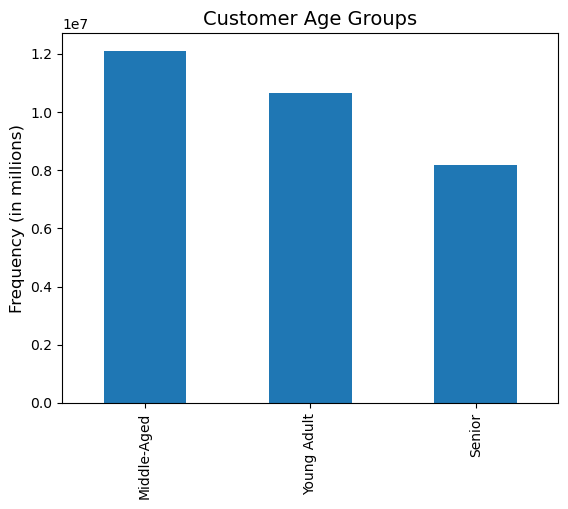

In [31]:
cust_age_group = customers['age_group'].value_counts().plot.bar()
plt.title('Customer Age Groups', fontsize=14)
plt.ylabel('Frequency (in millions)', fontsize = 12)

## 5.2 Segmentation according to income

In [32]:
#Looking at basic stats of the 'income' column
customers['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

## What we can see from the stats:
## Lowest income 25,903
## Highest income 593,901

### Income levels:
### Lower: < 52,200
### Middle: >= 52,200 & <=156,600
### Upper: >156,600

In [33]:
#Creating income level column of customers

customers.loc[(customers['income'] >=52200) & (customers['income']) <=156600, 'income_level'] = 'Middle' 
customers.loc[(customers['income'] >156600), 'income_level'] = 'Upper'
customers.loc[(customers['income'] <52200), 'income_level'] = 'Lower'

C:\Users\spada\AppData\Local\Temp\ipykernel_15200\3657445137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers.loc[(customers['income'] >=52200) & (customers['income']) <=156600, 'income_level'] = 'Middle'


In [34]:
#checking income level values
customers.income_level.value_counts()

Middle    24541393
Lower      3691708
Upper      2731463
Name: income_level, dtype: int64

In [35]:
#showing the added column
customers.shape

(30964564, 36)

### Customer income according to age group

In [36]:
# Create crosstab by income with age group
crosstab_income_age = pd.crosstab(customers['age_group'], customers['income_level'], dropna = False)

In [37]:
crosstab_income_age

income_level,Lower,Middle,Upper
age_group,,,
Middle-Aged,1115075,9423762,1565073
Senior,730954,6389060,1075530
Young Adult,1845679,8728571,90860


(array([0, 1, 2]),
 [Text(0, 0, 'Middle-Aged'), Text(1, 0, 'Senior'), Text(2, 0, 'Young Adult')])

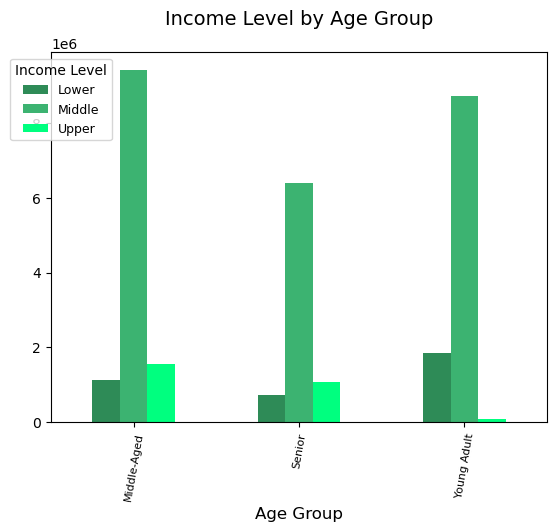

In [38]:
income_age_bar = crosstab_income_age.plot(kind = 'bar', color = ['seagreen','mediumseagreen','springgreen'])
income_age_bar.legend(title='Income Level', bbox_to_anchor=(0.02, 1.0), loc='upper center', labels=['Lower', 'Middle','Upper'], fontsize = 9)
plt.title('Income Level by Age Group', fontsize = 14, pad=20)
plt.ylabel('', fontsize = 12)
plt.xlabel('Age Group',  fontsize = 12)
plt.xticks(rotation=80, fontsize = 8)

## 5.3 Segmentation according to number of dependants

In [39]:
#Looking at basic stats of the 'income' column
customers['number_of_dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: number_of_dependants, dtype: float64

## What we know from the stats:
### Smallest number of dependants: 0
### Largest number of dependants: 3

### Grouping family by size
### Small: 0
### Mid-sized: 1-2
### Large: 3

In [40]:
#Creating family_size column of customers
customers.loc[(customers['number_of_dependants'] == 0), 'family_size'] = 'Small'
customers.loc[(customers['number_of_dependants'] == 1) | (customers['number_of_dependants'] == 2), 'family_size'] = 'Mid-sized'
customers.loc[customers['number_of_dependants'] == 3, 'family_size'] = 'Large'

C:\Users\spada\AppData\Local\Temp\ipykernel_15200\2622699633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers.loc[(customers['number_of_dependants'] == 0), 'family_size'] = 'Small'


In [41]:
#checking family_size values
customers.family_size.value_counts()

Mid-sized    15452367
Large         7772516
Small         7739681
Name: family_size, dtype: int64

In [42]:
#showing the added column
customers.shape

(30964564, 37)

In [43]:
#Looking at the connection between marital_status and number_of_dependants

family_crosstab = pd.crosstab(customers['marital_status'],customers['number_of_dependants'],dropna = False)

In [44]:
family_crosstab.head()

number_of_dependants,0,1,2,3
marital_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


In [45]:
#Creating household column of customers"
customers.loc[(customers['marital_status'] == 'divorced/widowed') & (customers['number_of_dependants']>=1), 'household'] = 'Single Parent'
customers.loc[(customers['marital_status'] == 'married') & (customers['number_of_dependants'] == 1),'household'] = 'Couple w/o Children'
customers.loc[(customers['marital_status'] == 'married') & (customers['number_of_dependants'] >1), 'household'] = 'Couple w/ Children'
customers.loc[(customers['marital_status'] == 'living with parents and siblings') & (customers['number_of_dependants'] > 0), 'household'] = 'Other'
customers.loc[(customers['marital_status'] == 'divorced/widowed') | (customers['marital_status'] == 'single'), 'household'] = 'Lives Alone'

C:\Users\spada\AppData\Local\Temp\ipykernel_15200\302446568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers.loc[(customers['marital_status'] == 'divorced/widowed') & (customers['number_of_dependants']>=1), 'household'] = 'Single Parent'


In [46]:
#checking household values
customers.household.value_counts()

Couple w/ Children     14532650
Lives Alone             7739681
Couple w/o Children     7211061
Other                   1481172
Name: household, dtype: int64

Text(0, 0.5, 'Frequency (in millions)')

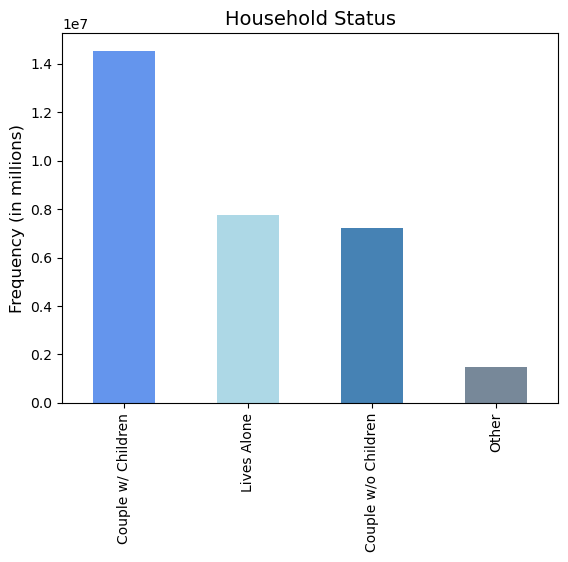

In [47]:
household_bar = customers['household'].value_counts().plot.bar(color = ['cornflowerblue', 'lightblue', 'steelblue','lightslategrey', 'midnightblue', 'b'])
plt.title('Household Status', fontsize= 14)
plt.ylabel('Frequency (in millions)', fontsize = 12)

## 5.4 Segmentation according to departments
#### Since the customer dataframe does not have deparment info, we had to import the departments_wrangled dataset.

In [48]:
df_depts

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [57]:
price_range_department=customers.groupby(['price_range_loc', 'department']).agg({'prices': ['mean', 'min','max']})

In [58]:
price_range_department

prices            
                                         mean   min   max
price_range_loc    department                            
High-range product dairy eggs             NaN   NaN   NaN
                   meat seafood     20.614098  15.1  25.0
                   pantry           20.000000  20.0  20.0
Low-range product  alcohol           2.908782   1.0   5.0
                   babies            3.178371   1.0   5.0
                   bakery            3.186643   1.0   5.0
                   beverages         2.996566   1.0   5.0
                   breakfast         3.186083   1.0   5.0
                   bulk              4.550720   1.4   5.0
                   canned goods      3.340307   1.0   5.0
                   dairy eggs        2.885395   1.0   5.0
                   deli              2.803003   1.0   5.0
                   dry goods pasta   2.866423   1.0   5.0
                   frozen            2.986593   1.0   5.0
                   household         2.835522   1.0   5.0
                   international     3.082673   1.0   5.0
                   missing           3.454655   1.0   5.0
                   other             2.798231   1.1   5.0
                   pantry            2.977494   1.0   5.0
                   personal care     3.112436   1.0   5.0
                   pets              3.186398   1.0   5.0
                   produce           2.935520   1.0   5.0
                   snacks            3.273982   1.6   5.0
Mid-range product  alcohol           9.703153   5.1  15.0
                   babies            9.508131   5.1  15.0
                   bakery            9.375987   5.1  15.0
                   beverages         9.855134   5.1  15.0
                   breakfast        10.227220   5.1  14.9
                   bulk              8.485851   5.1  14.1
                   canned goods      9.169108   5.1  15.0
                   dairy eggs       10.302173   5.1  15.0
                   deli              9.898290   5.1  15.0
                   dry goods pasta   9.719641   5.1  15.0
                   frozen            9.819265   5.1  15.0
                   household         9.828797   5.1  15.0
                   international     9.519454   5.1  15.0
                   meat seafood     10.288523   8.0  15.0
                   missing          10.744766   5.1  15.0
                   other            10.279396   5.1  15.0
                   pantry           10.000937   5.1  15.0
                   personal care    10.013464   5.1  15.0
                   pets              9.927803   5.1  15.0
                   produce           9.989176   5.1  15.0
                   snacks            5.979104   5.1   7.0

In [50]:
#adding in the department column
department = df_depts

In [51]:
#Checking to see added column
customers.shape

(30964564, 38)

In [52]:
#renaming to a more clear name
df_depts.rename(columns= {"Unnamed: 0": "department_id"}, inplace = True)

In [53]:
# Create a dictionary 
dept_dict = dict(zip(df_depts["department_id"], df_depts["department"]))

In [54]:
#dictionary of departments
dept_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [55]:
customers['department'] = customers['department_id'].map(dept_dict)

C:\Users\spada\AppData\Local\Temp\ipykernel_15200\3794278375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['department'] = customers['department_id'].map(dept_dict)


# 6. Customer Profile Visualization

## 6.1 Spending habits according to age group

In [169]:
# Create crosstab of household and Busiest days
crosstab_household_busy = pd.crosstab(customers['household'], customers['Busiest days'], dropna = False)

In [170]:
crosstab_household_busy

Busiest days,Busiest days,Least busy,Regularly busy
household,,,
Couple w/ Children,5308469,3423151,5801030
Couple w/o Children,2632089,1701445,2877527
Lives Alone,2839428,1822301,3077952
Other,540310,347632,593230


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Couple w/ Children'),
  Text(1, 0, 'Couple w/o Children'),
  Text(2, 0, 'Lives Alone'),
  Text(3, 0, 'Other')])

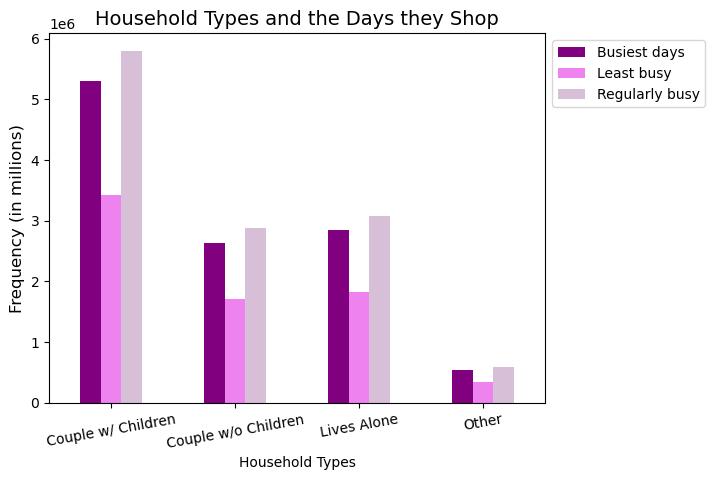

In [174]:
# Creating a bar chart for age_group and spending flag
household_busydays= crosstab_household_busy.plot.bar(color=['purple', 'violet', 'thistle'])
household_busydays.legend(title='', bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.title('Household Types and the Days they Shop', fontsize= 14)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Household Types')
plt.xticks(rotation=10)

## 6.2 Department purchases according to household

In [118]:
# Create crosstab of departments with household
crosstab_dept_household = pd.crosstab(customers['department'], customers['household'], dropna = False)

In [119]:
crosstab_dept_household

household,Couple w/ Children,Couple w/o Children,Lives Alone,Other
department,,,,
alcohol,66171,33250,36827,8379
babies,194848,92835,103328,19381
bakery,523567,262182,281395,53684
beverages,1209634,597819,645341,119107
breakfast,313272,157948,166432,33198
bulk,15724,8094,8000,1633
canned goods,476452,236125,251020,48477
dairy eggs,2421459,1211140,1294376,250207
deli,470594,231739,253382,48119


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

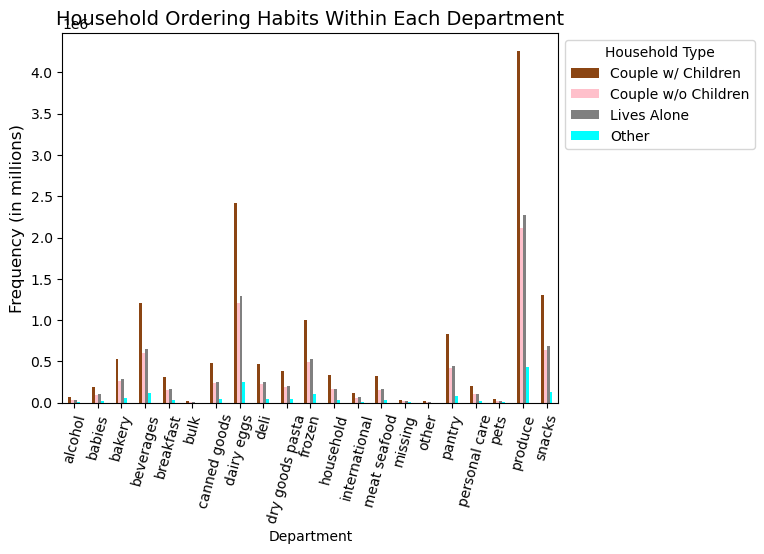

In [139]:
# Creating a bar chart for days_since_prior_order and loyalty flag
dept_household= crosstab_dept_household.plot.bar(color = ['saddlebrown', 'pink', 'grey', 'cyan'])
dept_household.legend(title='Household Type', bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.title('Household Ordering Habits Within Each Department', fontsize= 14)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Department')
plt.xticks(rotation=75)

## 6.3 Loyal customers and days since prior order

In [103]:
# Create crosstab by days_since_prior_order with loyalty flag
crosstab_loyalty_prior = pd.crosstab(customers['days_since_prior_order'], customers['loyalty_flag'], dropna = False)

In [104]:
crosstab_loyalty_prior

loyalty_flag,Loyal customer,New customer,Regular customer
days_since_prior_order,,,
0.0,239649,40517,157845
1.0,626159,43354,262177
2.0,973214,60662,417492
3.0,1185968,86136,587710
4.0,1202971,107496,747056
5.0,1074717,136069,886697
6.0,1090986,191359,1196418
7.0,1351314,291064,1775061
8.0,643383,185317,1065114


Text(0.5, 0, 'Days Since Prior Order')

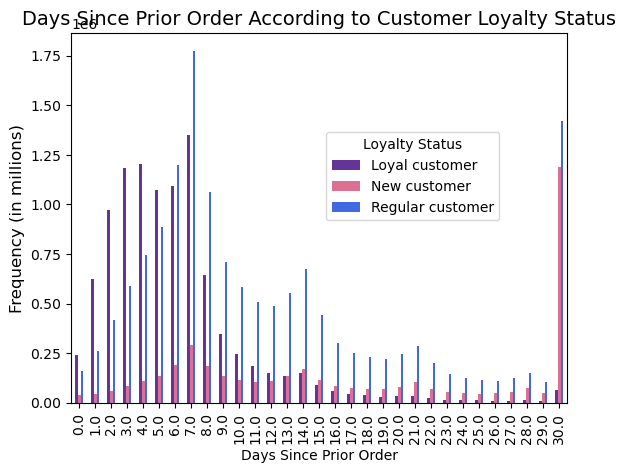

In [116]:
# Creating a bar chart for days_since_prior_order and loyalty flag
loyalty_prior_bar= crosstab_loyalty_prior.plot.bar(color = ['rebeccapurple', 'palevioletred', 'royalblue'])
loyalty_prior_bar.legend(title='Loyalty Status', bbox_to_anchor=(0.5, 0.75), loc='upper left')
plt.title('Days Since Prior Order According to Customer Loyalty Status', fontsize= 14)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Days Since Prior Order')

## 6.4 Order day of week and Loyalty Status

In [97]:
# Create crosstab by order_day_of_week with loyalty flag
crosstab_day_loyalty = pd.crosstab(customers['order_day_of_week'], customers['loyalty_flag'], dropna = False)

In [98]:
crosstab_day_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
order_day_of_week,,,
0,1754731,984879,3169000
1,1843401,818902,2749383
2,1352343,625288,2047075
3,1266495,560418,1842622
4,1292042,535931,1797021
5,1456715,587718,1989296
6,1318366,690559,2282379


Text(0.5, 0, 'Day of Week')

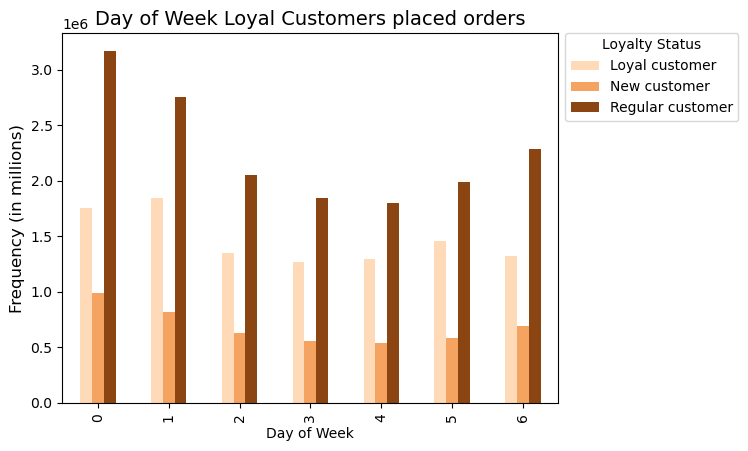

In [101]:
# Creating a bar chart for order_day_of_week and loyalty flag
orderday_loyalty_bar= crosstab_day_loyalty.plot.bar(color = ['peachpuff', 'sandybrown', 'saddlebrown'])
orderday_loyalty_bar.legend(title='Loyalty Status', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Day of Week Loyal Customers placed orders', fontsize= 14)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Day of Week')

## 6.5 Pet Owners

In [226]:
# Creating pet_owner column

customers.loc[customers['department'] == 'pets', 'pet_owner'] = 'Yes'
customers.loc[customers['department'] != 'pets', 'pet_owner'] = 'No'

In [152]:
#checking pet_owner values
customers.pet_owner.value_counts()

No     30871504
Yes       93060
Name: pet_owner, dtype: int64

Text(0.5, 1.0, 'Pet Owner & Non-Pet Owner Customers')

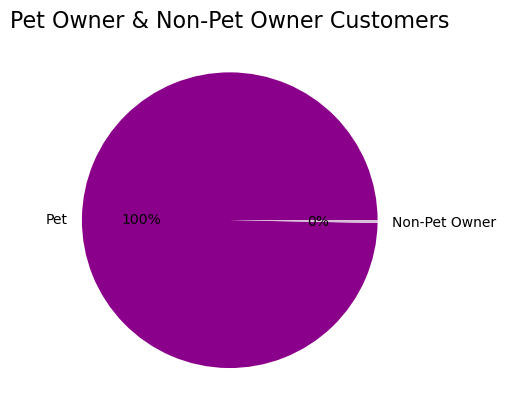

In [204]:
petowner_pie = customers['pet_owner'].value_counts().plot.pie(labels= ['Pet', 'Non-Pet Owner'],autopct=('%1.f%%'), label='', colors = ['darkmagenta', 'thistle'])
plt.title( "Pet Owner & Non-Pet Owner Customers", fontsize= '16')

## 6.6 Alcohol drinkers

In [227]:
# Creating alcohol_drinker column

customers.loc[customers['department'] == 'alcohol', 'alcohol_drinker'] ='Yes'
customers.loc[customers['department'] != 'alcohol', 'alcohol_drinker'] ='No'

In [154]:
customers.alcohol_drinker.value_counts()

No     30819937
Yes      144627
Name: alcohol_drinker, dtype: int64

Text(0.5, 1.0, 'Alcohol Drinker Distribution')

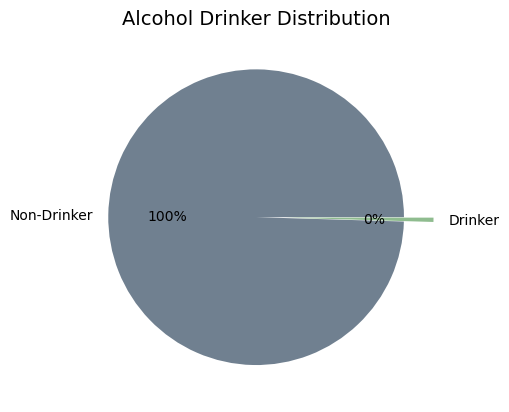

In [155]:
alcohol_pie = customers['alcohol_drinker'].value_counts().plot.pie(labels= ['Non-Drinker', 'Drinker'],autopct=('%1.f%%'), label='', colors = ['slategrey', 'darkseagreen'], explode = [0,0.2])
plt.title("Alcohol Drinker Distribution", fontsize= '14')

## 6.7 Families with a baby/babies

In [228]:
# Creating has_a_baby column

customers.loc[customers['department'] == 'babies', 'has_a_baby'] = 'Yes'
customers.loc[customers['department'] != 'babies', 'has_a_baby'] = 'No'

In [157]:
customers.has_a_baby.value_counts()

No     30554172
Yes      410392
Name: has_a_baby, dtype: int64

Text(0, 0.5, 'Number (in millions)')

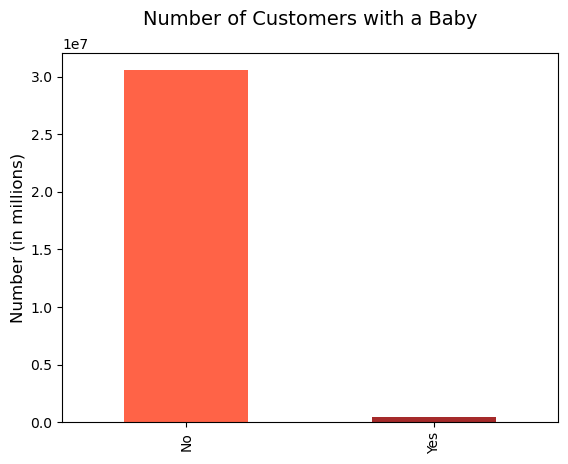

In [158]:
# Drawing a bar chart of 'has_a_baby' column

baby_bar = customers['has_a_baby'].value_counts().plot.bar(color = ['tomato', 'brown'])
plt.title('Number of Customers with a Baby', fontsize = 14, pad=20)
plt.ylabel('Number (in millions)', fontsize = 12)


## 6.8 Vegetarian

In [159]:
# List to create a vegetarian column. If a customer never purchased from the departments meat seafood or deli, then we are assuming they are a vegetarian.
result = []
for value in customers['department_id']:
    # 12 means 'meat seafood', 20 is the department_id of 'deli'
    if value not in (12,20):
        result.append('Yes')
    else:
        result.append('No')
result

['Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',


In [229]:
customers['vegetarian'] = result

C:\Users\spada\AppData\Local\Temp\ipykernel_7268\3249774837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['vegetarian'] = result


In [161]:
# checking the new column was added
customers.shape

(30964564, 43)

In [162]:
customers.vegetarian.value_counts()

Yes    29285949
No      1678615
Name: vegetarian, dtype: int64

Text(0.5, 1.0, 'Vegetarian & Non-Vegetarian Customers')

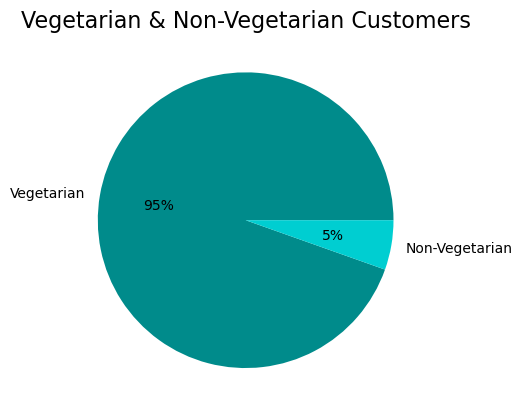

In [163]:
vegetarian_pie = customers['vegetarian'].value_counts().plot.pie(labels= ['Vegetarian', 'Non-Vegetarian'],autopct=('%1.f%%'), label='', colors = ['darkcyan', 'darkturquoise'])
plt.title( "Vegetarian & Non-Vegetarian Customers", fontsize= '16')

# 7. Customer Profile Aggregating for frequency and expenditure

### region

In [167]:
# Region expenditure aggregation
customers.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices           
               mean  min   max
region                        
Midwest    7.792318  1.0  25.0
Northeast  7.781441  1.0  25.0
South      7.794439  1.0  25.0
West       7.790308  1.0  25.0

In [168]:
#Region frequency aggregation
customers.groupby('region').agg({'add_to_cart_order': ['mean', 'min','max']})

add_to_cart_order         
                       mean min  max
region                              
Midwest            8.353883   1  109
Northeast          8.376380   1  145
South              8.365296   1  137
West               8.359292   1  114

### age_group

In [169]:
#age_group expenditure aggregation
customers.groupby('age_group').agg({'prices': ['mean', 'min','max']})

prices           
                 mean  min   max
age_group                       
Middle-Aged  7.791529  1.0  25.0
Senior       7.796715  1.0  25.0
Young Adult  7.784818  1.0  25.0

In [170]:
#age_group frequency aggregation
customers.groupby('age_group').agg({'add_to_cart_order': ['mean', 'min','max']})

add_to_cart_order         
                         mean min  max
age_group                             
Middle-Aged          8.354216   1  145
Senior               8.307779   1   99
Young Adult          8.415515   1  109

### household

In [171]:
#household expenditure aggregation
customers.groupby('household').agg({'prices': ['mean', 'min','max']})

prices           
                        mean  min   max
household                              
Couple w/ Children  7.790278  1.0  25.0
Divorced/Widowed    7.801014  1.0  25.0
Lives Alone         7.783597  1.0  25.0
Other               7.800604  1.0  25.0

In [172]:
#household frequency aggregation
customers.groupby('household').agg({'add_to_cart_order': ['mean', 'min','max']})

add_to_cart_order         
                                mean min  max
household                                    
Couple w/ Children          8.371756   1  145
Divorced/Widowed            8.367467   1  137
Lives Alone                 8.320522   1  109
Other                       8.373383   1  102

### pet_owner

In [173]:
#pet_owner expenditure aggregation
customers.groupby('pet_owner').agg({'prices': ['mean', 'min','max']})

prices           
               mean  min   max
pet_owner                     
No         7.790298  1.0  25.0
Yes        7.887489  1.0  15.0

In [174]:
#pet_owner frequency aggregation
customers.groupby('pet_owner').agg({'add_to_cart_order': ['mean', 'min','max']})

add_to_cart_order         
                       mean min  max
pet_owner                           
No                 8.364928   1  145
Yes                7.736331   1  121

### alcohol_drinker

In [175]:
#alcohol_drinker expenditure aggregation
customers.groupby('alcohol_drinker').agg({'prices': ['mean', 'min','max']})

prices           
                     mean  min   max
alcohol_drinker                     
No               7.788900  1.0  25.0
Yes              8.150699  1.0  15.0

In [176]:
#alcohol_drinker frequency aggregation
customers.groupby('alcohol_drinker').agg({'add_to_cart_order': ['mean', 'min','max']})

add_to_cart_order         
                             mean min  max
alcohol_drinker                           
No                       8.376734   1  145
Yes                      5.444578   1   90

### has_a_baby

In [177]:
#has_a_baby expenditure aggregation
customers.groupby('has_a_baby').agg({'prices': ['mean', 'min','max']})

prices           
                mean  min   max
has_a_baby                     
No          7.792688  1.0  25.0
Yes         7.634399  1.0  15.0

In [178]:
#has_a_baby frequency aggregation
customers.groupby('has_a_baby').agg({'add_to_cart_order': ['mean', 'min','max']})

add_to_cart_order         
                        mean min  max
has_a_baby                           
No                  8.333289   1  145
Yes                10.577894   1   92

### vegetarian

In [179]:
#vegetarian expenditure aggregation
customers.groupby('vegetarian').agg({'prices': ['mean', 'min','max']})

prices           
                 mean  min   max
vegetarian                      
No          11.206942  1.0  25.0
Yes          7.594739  1.0  20.0

In [180]:
#vegetarian frequency aggregation
customers.groupby('vegetarian').agg({'add_to_cart_order': ['mean', 'min','max']})

add_to_cart_order         
                        mean min  max
vegetarian                           
No                  8.643732   1  142
Yes                 8.346950   1  145

# 8. Comparing customer profiles with regions and departments

## 8.1 Order time of day

In [80]:
#distribution of orders within 24 hours day

customers['order_hour_of_day'].value_counts(dropna = False).sort_index()

0      208042
1      109621
2       65691
3       48796
4       50763
5       84418
6      281013
7      863213
8     1659110
9     2363611
10    2649744
11    2614880
12    2495795
13    2539276
14    2567903
15    2535966
16    2413681
17    1982345
18    1551184
19    1193878
20     930909
21     763111
22     607060
23     384554
Name: order_hour_of_day, dtype: int64

In [81]:
#create list for new order_time_day column
order_time = []

for hour in customers['order_hour_of_day']:
    if hour in [0, 1, 2, 3, 4, 17, 18, 19, 20, 21, 22, 23]:
        order_time.append('Night owl')
    elif hour in [5, 6, 7, 8]:
        order_time.append('Early bird')
    else:
        order_time.append('Regular')

In [82]:
order_time

['Early bird',
 'Early bird',
 'Regular',
 'Early bird',
 'Regular',
 'Early bird',
 'Regular',
 'Regular',
 'Regular',
 'Early bird',
 'Early bird',
 'Early bird',
 'Early bird',
 'Regular',
 'Early bird',
 'Regular',
 'Early bird',
 'Regular',
 'Regular',
 'Regular',
 'Early bird',
 'Early bird',
 'Early bird',
 'Early bird',
 'Early bird',
 'Early bird',
 'Regular',
 'Early bird',
 'Regular',
 'Early bird',
 'Regular',
 'Regular',
 'Regular',
 'Early bird',
 'Early bird',
 'Regular',
 'Early bird',
 'Regular',
 'Early bird',
 'Regular',
 'Early bird',
 'Regular',
 'Early bird',
 'Regular',
 'Regular',
 'Regular',
 'Early bird',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Early bird',
 'Regular',
 'Regular',
 'Early bird',
 'Early bird',
 'Early bird',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Night owl',
 'Early bird',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regula

In [84]:
customers['order_time_period'] = order_time

C:\Users\spada\AppData\Local\Temp\ipykernel_15200\3003689709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['order_time_period'] = order_time


In [85]:
#print the frequency of the new column
customers['order_time_period'].value_counts(dropna = False)

Regular       20180856
Night owl      7895954
Early bird     2887754
Name: order_time_period, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Regular'), Text(1, 0, 'Night owl'), Text(2, 0, 'Early bird')])

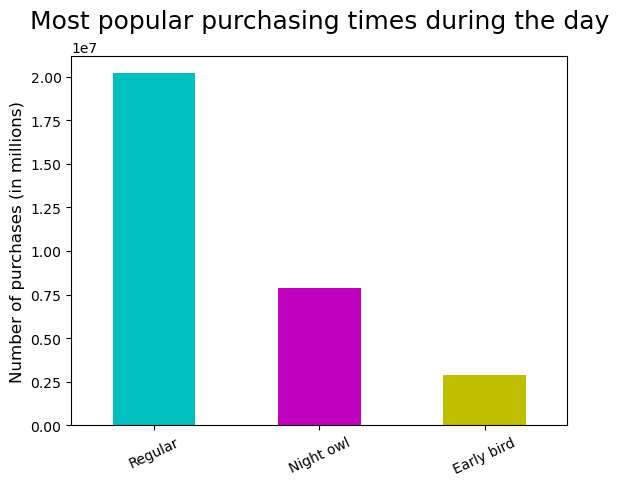

In [86]:
#creating a bar chart for order habit column
bar_order_time = customers['order_time_period'].value_counts().plot.bar(color = ['c', 'm', 'y'])
plt.title('Most popular purchasing times during the day', fontsize = 18, pad=20)
plt.ylabel('Number of purchases (in millions)', fontsize = 12)
plt.xticks(rotation=25)

## 8.2 Order Time of Day and Department

In [90]:
#looking at departmental spending by order time
crosstab_dept_time = pd.crosstab(customers['department'], customers['order_time_period'], dropna = False)

In [91]:
crosstab_dept_time

order_time_period,Early bird,Night owl,Regular
department,,,
alcohol,7972,33510,103145
babies,50188,106291,253913
bakery,107807,280669,732352
beverages,231045,634732,1706124
breakfast,68714,168722,433414
bulk,3057,8637,21757
canned goods,88259,253266,670549
dairy eggs,515309,1301648,3360225
deli,88984,258266,656584


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

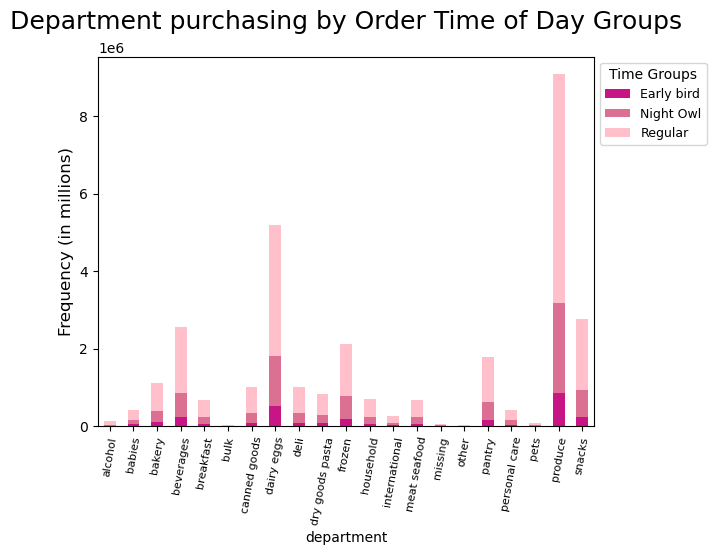

In [95]:
bar_dept_time = crosstab_dept_time.plot(kind = 'bar', stacked = True, color =['mediumvioletred','palevioletred','pink'])
bar_dept_time.legend(title='Time Groups', bbox_to_anchor=(1.0,1.0), loc='upper left', labels=['Early bird', 'Night Owl', 'Regular'], fontsize = 9)
plt.title('Department purchasing by Order Time of Day Groups', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xticks(rotation=80, fontsize = 8)

## 8.3 Pet Owners per Region

In [195]:
crosstab_petowner = pd.crosstab(customers['region'], customers['pet_owner'], dropna = False)

In [196]:
crosstab_petowner

pet_owner,No,Yes
region,,
Midwest,7240155,21358
Northeast,5446951,17734
South,10281230,29909
West,7903168,24059


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

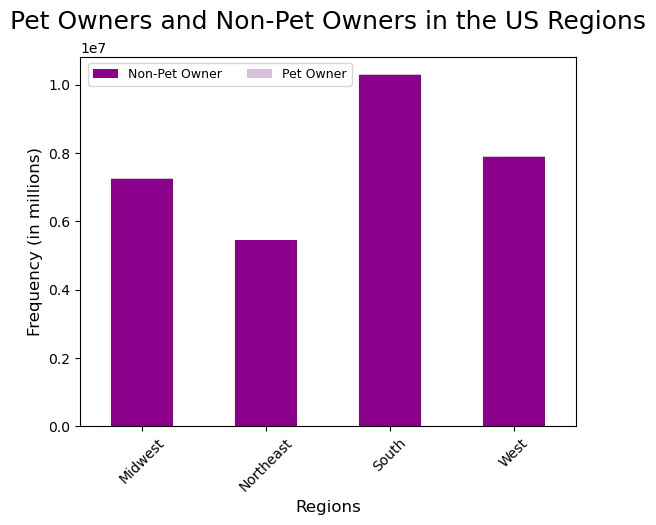

In [203]:
# Plotting the stacked bar
crosstab_petowner_pie= crosstab_petowner.plot(kind = 'bar', stacked = True, color =['darkmagenta', 'thistle'])
crosstab_petowner_pie.legend(title='', bbox_to_anchor=(0.56, 1.0), loc='upper right', ncol = 2, labels=['Non-Pet Owner', 'Pet Owner'], fontsize = 9)
plt.title('Pet Owners and Non-Pet Owners in the US Regions', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Regions',  fontsize = 12)
plt.xticks(rotation=45)

## 8.4 Order Day of Week and Age Group

In [205]:
# Seeing the connection of age groups and the day of orders
crosstab_age_day = pd.crosstab(customers['age_group'], customers['order_day_of_week'], dropna = False)

In [206]:
#Viewing results of crosstab
crosstab_age_day

order_day_of_week,0,1,2,3,4,5,6
age_group,,,,,,,
Middle-Aged,2301009,2112438,1583124,1431181,1415669,1576837,1683652
Senior,1566244,1417495,1065170,978350,956161,1066115,1146009
Young Adult,2041357,1881753,1376412,1260004,1253164,1390777,1461643


Text(0.5, 1.0, 'Days purchases were made according to each age group')

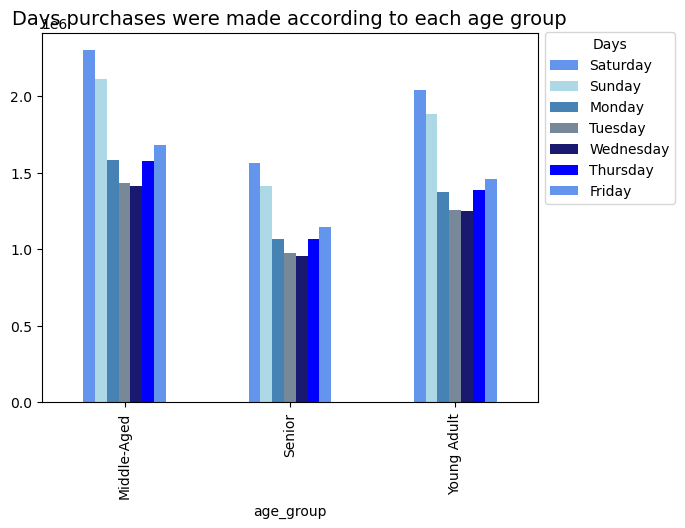

In [235]:
# Creating a bar chart for age groups and the day of orders
age_day_bar = crosstab_age_day.plot.bar(color = ['cornflowerblue', 'lightblue', 'steelblue','lightslategrey', 'midnightblue', 'b'])
age_day_bar.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Days purchases were made according to each age group', fontsize= 14)

## 8.5 Household Status By US Region

In [208]:
crosstab_household = pd.crosstab(customers['region'], customers['household'], dropna = False)

In [209]:
crosstab_household

household,Couple w/ Children,Couple w/o Children,Lives Alone,Other
region,,,,
Midwest,3367591,1719671,1822816,351435
Northeast,2564228,1289545,1354482,256430
South,4854839,2368910,2581933,505457
West,3745992,1832935,1980450,367850


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

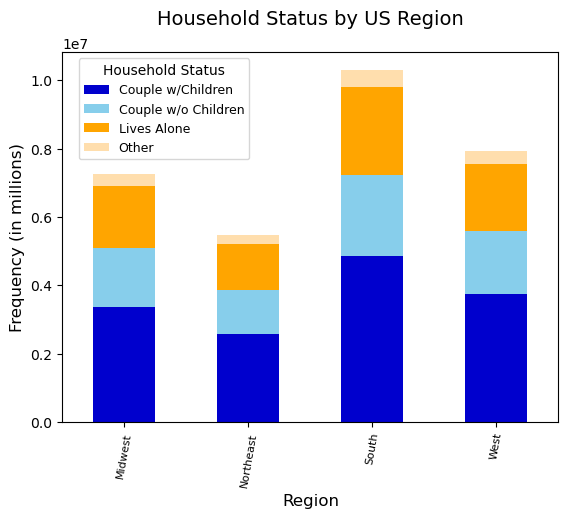

In [210]:
household_bar = crosstab_household.plot(kind = 'bar', stacked = True, color= ['mediumblue','skyblue','orange','navajowhite'])
household_bar.legend(title='Household Status', bbox_to_anchor=(0.02, 1.0), loc='upper left', labels=['Couple w/Children', 'Couple w/o Children','Lives Alone', 'Other'], fontsize = 9)
plt.title('Household Status by US Region', fontsize = 14, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)
plt.xticks(rotation=80, fontsize = 8)

## 8.6 Loyal Customers By US Region

In [211]:
# Create crosstab by region with loyalty flag
crosstab_loyalty_region = pd.crosstab(customers['region'], customers['loyalty_flag'], dropna = False)

Text(0.5, 1.0, 'Loyal Customers by Region')

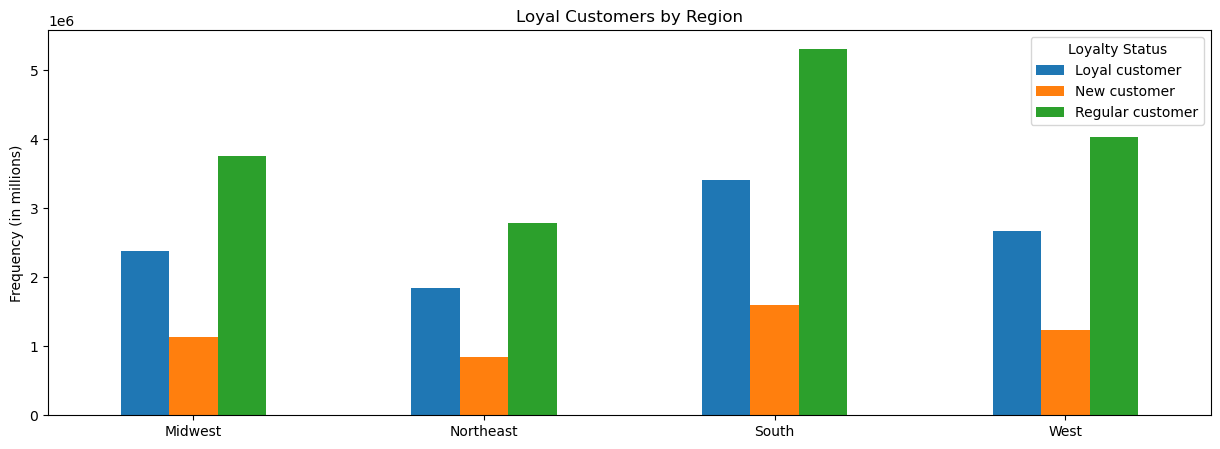

In [212]:
# Create barchart from crosstab
bar_loyalty_region = crosstab_loyalty_region.iloc[:,[0,1,2]].plot.bar(rot=0, figsize=(15,5)).legend(title="Loyalty Status", bbox_to_anchor=(1.0,1.0))
plt.xlabel('')
plt.ylabel('Frequency (in millions)')
plt.title ('Loyal Customers by Region')

## 8.7 Vegetarians in each Region

In [214]:
crosstab_vegetarian = pd.crosstab(customers['region'], customers['vegetarian'], dropna = False)

In [215]:
crosstab_vegetarian

vegetarian,No,Yes
region,,
Midwest,392724,6868789
Northeast,296969,5167716
South,557740,9753399
West,431182,7496045


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

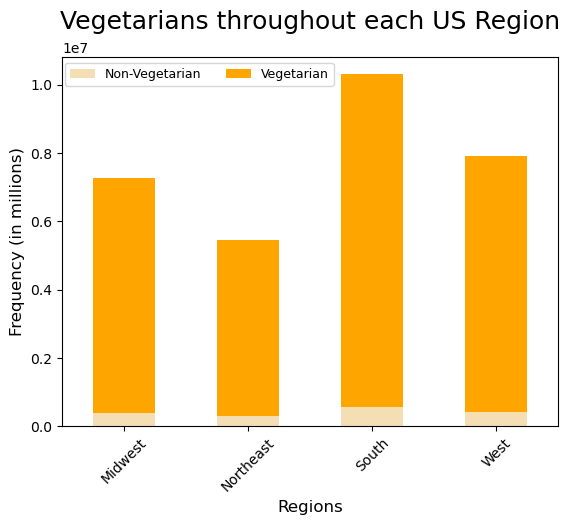

In [220]:
# Plotting the stacked 
crosstab_veg_pie= crosstab_vegetarian.plot(kind = 'bar', stacked = True, color =['wheat', 'orange'])
crosstab_veg_pie.legend(title='', bbox_to_anchor=(0.56, 1.0), loc='upper right', ncol = 2, labels=['Non-Vegetarian', 'Vegetarian'], fontsize = 9)
plt.title('Vegetarians throughout each US Region', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Regions',  fontsize = 12)
plt.xticks(rotation=45)

# 9. Exporting Charts and Dataframes

## 9.1 Exporting Charts

In [175]:
#Exporting Household shopping day bar chart in .png format

household_busydays.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'household_busydays.png'), bbox_inches='tight')

In [140]:
#Exporting Household Ordering Habits Within Each Department  bar chart in .png format

dept_household.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_household.png'), bbox_inches='tight')

In [117]:
# Exporting Days since prior order for customer loyalty status bar chart in .png format

loyalty_prior_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_prior_bar.png'), bbox_inches='tight')

In [102]:
# Exporting Day of week loyal customers placed orders bar chart in .png format

orderday_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orderday_loyalty_bar.png'), bbox_inches='tight')

In [96]:
# Exporting department purchasing by order time groups bar chart in .png format

bar_dept_time.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dept_time.png'), bbox_inches='tight')

In [87]:
# Exporting bar chart in .png format

bar_order_time.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_order_time.png'), bbox_inches='tight')

In [246]:
# Exporting customer age group bar chart in .png format

cust_age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cust_age_group.png'), bbox_inches='tight')

In [243]:
# Exporting income level by age group bar chart in .png format

income_age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_age_bar.png'), bbox_inches='tight')

In [242]:
# Exporting household status bar chart in .png format

household_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'household_bar.png'), bbox_inches='tight')

In [241]:
# Exporting pet owner and non-pet owner customers bar chart in .png format

petowner_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'petowner_pie.png'), bbox_inches='tight')

In [240]:
# Exporting alcohol drinker distribution pie chart in .png format

alcohol_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'alcohol_pie.png'), bbox_inches='tight')

In [239]:
# Exporting number of customers with a baby bar chart in .png format

baby_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'baby_bar.png'), bbox_inches='tight')

In [238]:
# Exporting vegetarian and non-vegetarian customers pie chart in .png format

vegetarian_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vegetarian_pie.png'), bbox_inches='tight')

In [237]:
# Exporting pet owners and non-pet owners in the US regions bar chart in .png format

crosstab_petowner_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'crosstab_petowner_pie.png'), bbox_inches='tight')

In [236]:
# Exporting days purchases were made according to each age group bar chart in .png format

age_day_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_day_bar.png'), bbox_inches='tight')

In [234]:
# Exporting household status by US region bar chart in .png format

household_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'household_bar.png'), bbox_inches='tight')

In [233]:
# Exporting loyal customers per US region bar chart in .png format

bar_loyalty_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_region.png'), bbox_inches='tight')

In [232]:
# Exporting vegetarians throughout each US region pie chart in .png format

crosstab_veg_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'crosstab_veg_pie.png'), bbox_inches='tight')

## 9.2 Exporting Dataframes

In [176]:
#exporting low_activity_cust dataframe
low_activity_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_cust_orders.pkl'))

In [177]:
#exporting high_activity_cust dataframe
high_activity_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_cust_orders.pkl'))

MemoryError: 